<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Implementing_the_solution_with_Random_Forest_and_Challenging_the_Solution_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading libraries and cleaned data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
clean_train = pd.read_csv("/content/drive/My Drive/Akeed Datasets/after_univariate_clean.csv")

In [3]:
clean_train.head(1)

,akeed_customer_id,gender,customer_acc_verified,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,preparation_time,discount_percentage,vendor_acc_verified,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,vendor_duration_open,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1,11,4.4,1.0,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9 days +19:25:41,789 days 19:56:20


In [4]:
clean_train.tail(1)

,akeed_customer_id,gender,customer_acc_verified,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,preparation_time,discount_percentage,vendor_acc_verified,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,vendor_duration_open,haversine_dist,c_diff,u_diff
5627745,LBMRK7A,2,1,0,19.83,3.03,907,132953.0,13.336,-1.449,Restaurants,2.0,0.7,12.0,1.0,20,0.0,1,11,4.3,1.0,3,LBMRK7A X 0 X 907,0,15,865.420746,-58 days +05:25:06,34 days 10:17:43


In [5]:
clean_train.shape

(5627746, 28)

In [6]:
# dropping unnecessary columns

train = clean_train.drop(['akeed_customer_id', 'city_id', 'CID X LOC_NUM X VENDOR', 'c_diff', 'u_diff', 'vendor_category_en'], axis = 1)
train.shape

(5627746, 22)

## Implementing the solution with Random Forest

In [7]:
# checking target variable distribution
train['target'].value_counts()

0    5553040
1      74706
Name: target, dtype: int64

In [8]:
train.target.value_counts(normalize=True)

0    0.986725
1    0.013275
Name: target, dtype: float64

The data is highly imbalanced with 98.67% representing the zeros and only 1.33% representing the ones. We will start off with a random forest benchmark/baseline model. Why Random Forest? Because it's known to work well with imbalanced data.

## RANDOM FOREST

### Random Forest Baseline Model

In [ ]:
# we first split the data into dependent and independent variables

y = train['target'].values
features = train.columns.to_list()
features.remove('target')
X = train[features].values

In [ ]:
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0) 

In [ ]:
# Buiding the model and fitting to our dataset

forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
forest_classifier = forest_classifier.fit(X_train, y_train)

In [ ]:
# pickling our built model to avoid rerunning it again

# import pickle #importing the library
# pickle_out = open("df.pickle", "wb")  #opening a file to write bytes
# pickle.dump(forest_classifier, pickle_out) # use pickle.dump to put the df into the opened file
# pickle_out.close() #then close the pickled file

In [ ]:
# import pickle
# # unpickling cleaned_train
# pickle_in = open("df.pickle","rb")  #opening the pickle file
# forest_classifier = pickle.load(pickle_in)  #using pickle load to load the df

In [ ]:
clean_train.shape

(5627746, 28)

In [ ]:
# Making predictions using the model we trained
y_pred = forest_classifier.predict(X_val)

In [ ]:
# evaluating the model
print('Accuracy score1 =',accuracy_score(y_val, y_pred)*100,'%')
print(confusion_matrix(y_val, y_pred))

Accuracy score1 = 98.66915355109565 %
[[1665855       0]
 [  22469       0]]


In [ ]:
#finding the f1 score which is the weighted average of precision and recall
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print(f1_score(y_val, y_pred))

# finding recall/sensitivity. recall is the number of true positives divided by the number of true positive values.
# Recall or sensitivity can also be referred to as the true positive rate, it measures the completeness of a classifier. 
# Low recall indicates a high number of false negatives.
print(recall_score(y_val, y_pred))

0.0
0.0


Our results are very concerning!!! 0% for both recall and f1 score is really bad. This means that there were no true positive observations that were accurately predicted. 

The high accuracy score of 98.67% is misleading because all the true observations were misclassified. Our interest is more on the misclassified observations because these observations are the ones that bring in revenue to Akeed. 

To bring f1 and recall score up, we need to look into: downsampling of the data, selecting important features and hyperparameter tuning. Will these steps improve the prediction of the positive observations? Let's find out below.

### Downsampling of the majority class(target = 0). Final ratio of majority class to minority 2:1.

In [ ]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]
df_class_0_downsampled = df_class_0.sample(2 * count_class_1)
df_downsampled = pd.concat([df_class_0_downsampled, df_class_1], axis=0)

print('Random downsampling:')
print(df_downsampled.target.value_counts())


Random downsampling:
0    149412
1     74706
Name: target, dtype: int64


''

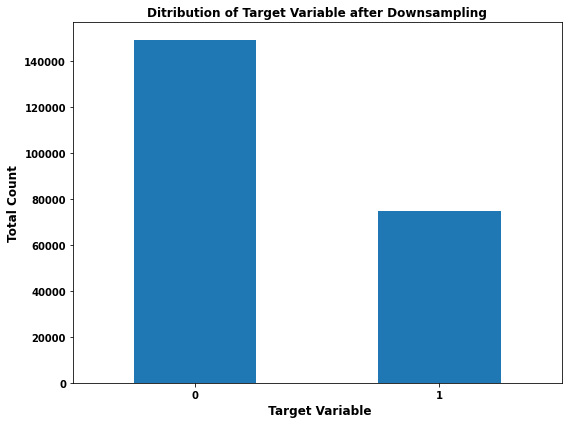

In [ ]:
plt.subplots(figsize = (8,6))
df_downsampled.target.value_counts().plot(kind='bar')
plt.xticks(rotation = 0, fontweight = 'bold')
plt.title('Ditribution of Target Variable after Downsampling', fontweight = 'bold')
plt.yticks(rotation = 0, fontweight = 'bold')
plt.xlabel(' Target Variable', fontsize = 12, fontweight = 'bold')
plt.ylabel('Total Count', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
;

### Random Forest after Downsampling

In [ ]:
# we first split the data into dependent and independent variables

y = df_downsampled['target'].values
features = df_downsampled.columns.to_list()
features.remove('target')
X = df_downsampled[features].values

In [ ]:
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
# Buiding the model and fitting to our dataset

forest_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
forest_classifier2 = forest_classifier2.fit(X_train, y_train)

In [ ]:
# Making predictions using the model we trained
y_pred2 = forest_classifier2.predict(X_val)

In [ ]:
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred2),'%')
print(recall_score(y_val, y_pred2),'%')
print(confusion_matrix(y_val, y_pred2))
print('Accuracy score1 =',accuracy_score(y_val, y_pred2)*100,'%')


0.47554213898472153 %
0.34492157826533804 %
[[42491  2366]
 [14660  7719]]
Accuracy score1 = 74.6772562317806 %


Both f1 and recall have improved to 47.51% and 34.57% respectively. Accuracy score reduced to 74.57%. These results are still poor. We need a better perfoming model. Next we will look into feature importance with the downsampled  data.

### Feature Selection

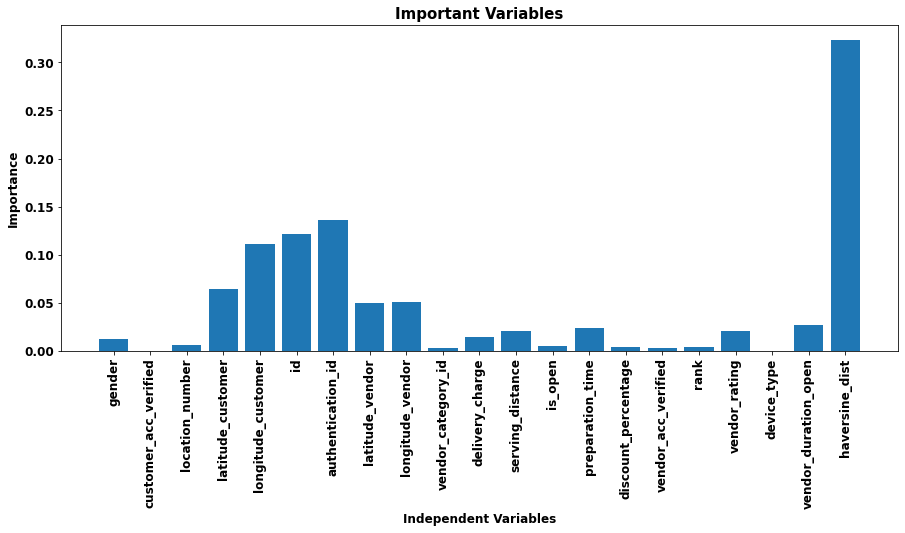

In [ ]:
# Get numerical feature importances
importances = list(forest_classifier2.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
# feature_importances = pd.DataFrame(feature_importances)
# print(feature_importances)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.subplots(figsize = (15,6))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation= 'vertical', fontweight = 'bold', fontsize = 12)
plt.yticks(fontweight = 'bold', fontsize = 12)
# Axis labels and title
plt.ylabel('Importance', fontweight = 'bold', fontsize = 12);
plt.xlabel('Independent Variables', fontweight = 'bold', fontsize = 12);
plt.title('Important Variables', fontweight = 'bold', fontsize = 15);

The graph shows how the independent features are affecting the target variable. Some of the top important features include haversine distance, authentication id, id, customer latitude and longitude.

In [ ]:
df_downsampled.columns

Index(['gender', 'customer_acc_verified', 'location_number',
       'latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor', 'vendor_category_id',
       'delivery_charge', 'serving_distance', 'is_open', 'preparation_time',
       'discount_percentage', 'vendor_acc_verified', 'rank', 'vendor_rating',
       'device_type', 'target', 'vendor_duration_open', 'haversine_dist'],
      dtype='object')

### Random Forest with the 12 most Important Features

In [ ]:
# selecting the most important features
train3 = df_downsampled[[ 'latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor', 'delivery_charge', 'serving_distance', 'preparation_time','vendor_rating','target', 
       'vendor_duration_open', 'haversine_dist']]
train3.shape # shape of our new dataset

(224118, 13)

In [ ]:
train3.head(1)

,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,delivery_charge,serving_distance,preparation_time,vendor_rating,target,vendor_duration_open,haversine_dist
4528146,-0.5,0.7095,843,130447.0,-1.27,0.08234,0.0,5.0,10,4.3,0,15,110.421245


In [ ]:
# we first split the data into dependent and independent variables
y = train3['target'].values
features_train3 = train3.columns.to_list()
features_train3.remove('target')
X = train3[features_train3].values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Buiding the model and fitting to our dataset
forest_classifier3 = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
forest_classifier3 = forest_classifier3.fit(X_train, y_train)
# Making predictions using the model we trained
y_pred3 = forest_classifier3.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred3),'%')
print(recall_score(y_val, y_pred3),'%')
print(confusion_matrix(y_val, y_pred3))
print('Accuracy score1 =',accuracy_score(y_val, y_pred3)*100,'%')


0.5305165645211399 %
0.4196791635014969 %
[[41221  3636]
 [12987  9392]]
Accuracy score1 = 75.27663751561663 %


F1 and recall score have improved quite a bit. Accuracy score also improved from 74% to 75%.

### Scaling data to see if the model perfomance improves

In [ ]:
# Scaling our Data
# ---
train_to_scale = train3
print(train_to_scale.shape)

# we first split the data into dependent and independent variables
y = train_to_scale['target'].values
features_train5 = train_to_scale.columns.to_list()
features_train5.remove('target')
X = train_to_scale[features_train5].values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_val = feature_scaler.transform(X_val)
# Buiding the model and fitting to our dataset
forest_classifier_scaled = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
forest_classifier_scaled = forest_classifier_scaled.fit(X_train, y_train)
# Making predictions using the model we trained
y_pred5 = forest_classifier_scaled.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred5),'%')
print(recall_score(y_val, y_pred5),'%')
print(confusion_matrix(y_val, y_pred5))
print('Accuracy score1 =',accuracy_score(y_val, y_pred5)*100,'%')

(224118, 13)
0.5305995650823236 %
0.4197685329996872 %
[[41221  3636]
 [12985  9394]]
Accuracy score1 = 75.27961211255875 %


After scaling the data, we see insignificant improvements. 


### Random Forest with top 7 most Important Features

In [ ]:
# selecting the most important features
train4 = df_downsampled[[ 'latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor','target', 
        'haversine_dist']]
train4.shape # shape of our new dataset

(224118, 8)

In [ ]:
# we first split the data into dependent and independent variables
y = train4['target'].values
features_train4 = train4.columns.to_list()
features_train4.remove('target')
X = train4[features_train4].values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Buiding the model and fitting to our dataset
forest_classifier4 = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
forest_classifier4 = forest_classifier4.fit(X_train, y_train)
# Making predictions using the model we trained
y_pred4 = forest_classifier4.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred4),'%')
print(recall_score(y_val, y_pred4),'%')
print(confusion_matrix(y_val, y_pred4))
print('Accuracy score1 =',accuracy_score(y_val, y_pred4)*100,'%')

0.5289897551852163 %
0.42338799767639307 %
[[40888  3969]
 [12904  9475]]
Accuracy score1 = 74.90481289785235 %


There is a slight improvement in recall score, but f1 and accuracy score dropped slightly.

### Random forest with top 7 scaled data

In [ ]:
# we first split the data into dependent and independent variables
y = train4['target'].values
features_train4 = train4.columns.to_list()
features_train4.remove('target')
X = train4[features_train4].values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_val = feature_scaler.transform(X_val)
# Buiding the model and fitting to our dataset
forest_classifier6 = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
forest_classifier6 = forest_classifier6.fit(X_train, y_train)
# Making predictions using the model we trained
y_pred6 = forest_classifier6.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred6),'%')
print(recall_score(y_val, y_pred6),'%')
print(confusion_matrix(y_val, y_pred6))
print('Accuracy score1 =',accuracy_score(y_val, y_pred6)*100,'%')

0.5287234339654258 %
0.42298583493453684 %
[[40895  3962]
 [12913  9466]]
Accuracy score1 = 74.90183830091023 %


Perfomance about the same from previous results when data was not scaled.

### Hyperparameter Tuning

In [ ]:

train7 = train4
y = train7['target'].values
features_train7 = train7.columns.to_list()
features_train7.remove('target')
X = train7[features_train7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)
classifier7 = RandomForestClassifier(random_state=0)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier7, X=X_train, y=y_train, cv=5)
print(all_accuracies.mean())

0.7948457858898357


In [ ]:
specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [2,3,4,5],
              "max_features": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              "min_samples_split": [2,3,4,5,6,7],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [50, 100, 200, 300, 500]}


In [ ]:
# Step 2: Instantiating RandomizedSearchCV object 
# ---
# 
from sklearn.model_selection import RandomizedSearchCV 
random_search = RandomizedSearchCV(classifier7, param_dist, cv = 5) 

In [ ]:
# Step 3: Calling the fit method
# ---
#
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_parameters = random_search.best_params_
print(best_parameters)

{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 0.3, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}


In [ ]:
# Finding the obtained accuracy
# --
# 
best_result = random_search.best_score_
print(best_result)


0.7452416459569503


### Building Random Forest using the best parameters

In [ ]:

# we first split the data into dependent and independent variables
y = train7['target'].values
features_train7 = train7.columns.to_list()
features_train7.remove('target')
X = train7[features_train4].values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_val = feature_scaler.transform(X_val)
# Buiding the model and fitting to our dataset
forest_classifier9 = RandomForestClassifier(n_estimators= 500,
                                            min_samples_split= 2, max_features=0.3, max_depth=5,
                                            criterion='gini', bootstrap=False)
forest_classifier9 = forest_classifier9.fit(X_train, y_train)
# Making predictions using the model we trained
y_pred9 = forest_classifier9.predict(X_val)

# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred9),'%')
print(recall_score(y_val, y_pred9),'%')
print(confusion_matrix(y_val, y_pred9))
print('Accuracy score1 =',accuracy_score(y_val, y_pred9)*100,'%')

0.5183614621321347 %
0.40966977970418694 %
[[41031  3826]
 [13211  9168]]
Accuracy score1 = 74.66089594859896 %


There is a slight drop in both f1 and recall scores. Hyperparameter is not improving the model's perfomance.

### Downsampling part 2 where majority and minority class ratio is 5:1

Random downsampling:
0    373530
1     74706
Name: target, dtype: int64


''

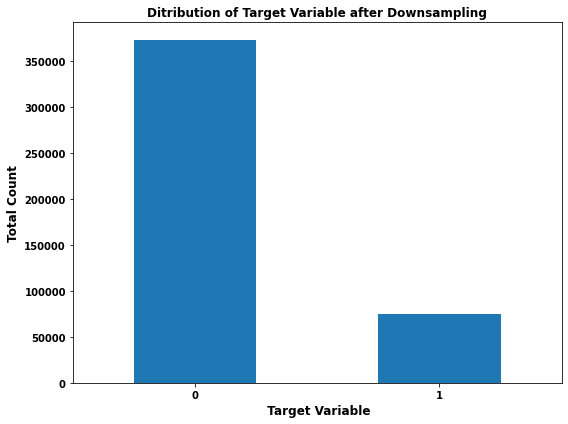

In [ ]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
class_0 = train[train['target'] == 0]
class_1 = train[train['target'] == 1]
class_0_downsampled = class_0.sample(5 * count_class_1)
df_downsampled2 = pd.concat([class_0_downsampled, df_class_1], axis=0)

print('Random downsampling:')
print(df_downsampled2.target.value_counts())

plt.subplots(figsize = (8,6))
df_downsampled2.target.value_counts().plot(kind='bar')
plt.xticks(rotation = 0, fontweight = 'bold')
plt.title('Ditribution of Target Variable after Downsampling', fontweight = 'bold')
plt.yticks(rotation = 0, fontweight = 'bold')
plt.xlabel(' Target Variable', fontsize = 12, fontweight = 'bold')
plt.ylabel('Total Count', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
;

### Random Forest with 0.2% target =1

In [ ]:
# we first split the data into dependent and independent variables

y = df_downsampled2['target'].values
# features = df_downsampled.columns.to_list()
# features.remove('target')
X = df_downsampled2.drop(['target'], axis =1).values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Buiding the model and fitting to our dataset

rf= RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
rf= rf.fit(X_train, y_train)

# Making predictions using the model we trained
y_prediction = rf.predict(X_val)

# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_prediction),'%')
print(recall_score(y_val, y_prediction),'%')
print(confusion_matrix(y_val, y_prediction))
print('Accuracy score1 =',accuracy_score(y_val, y_prediction)*100,'%')


0.03784722222222222 %
0.019358849125299706 %
[[111867     82]
 [ 22086    436]]
Accuracy score1 = 83.514661153706 %


Poor perfomance! Having a significantly high ratio of majority class results in poor perfomance of our model. 

### Downsamling part 3 with equal majority and minority class.

Random downsampling:
1    74706
0    74706
Name: target, dtype: int64


''

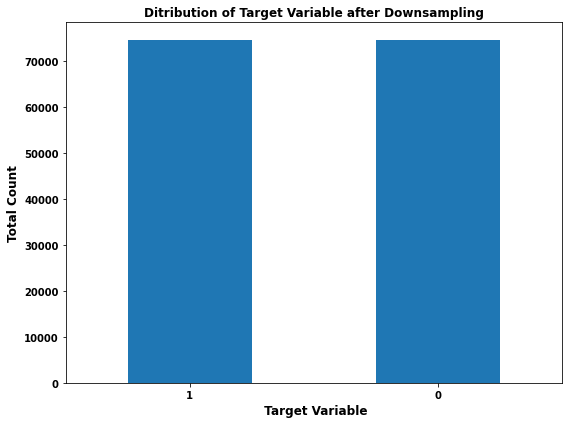

In [9]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
class_0 = train[train['target'] == 0]
class_1 = train[train['target'] == 1]
class_0_downsampled = class_0.sample(count_class_1)
df_downsampled3 = pd.concat([class_0_downsampled, class_1], axis=0)

print('Random downsampling:')
print(df_downsampled3.target.value_counts())

plt.subplots(figsize = (8,6))
df_downsampled3.target.value_counts().plot(kind='bar')
plt.xticks(rotation = 0, fontweight = 'bold')
plt.title('Ditribution of Target Variable after Downsampling', fontweight = 'bold')
plt.yticks(rotation = 0, fontweight = 'bold')
plt.xlabel(' Target Variable', fontsize = 12, fontweight = 'bold')
plt.ylabel('Total Count', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
;

### Random Forest with equal class sizes

In [10]:
# we first split the data into dependent and independent variables

y = df_downsampled3['target'].values
# features = df_downsampled.columns.to_list()
# features.remove('target')
X = df_downsampled3.drop(['target'], axis =1).values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Buiding the model and fitting to our dataset

rf1= RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 2, max_depth=5)
rf1= rf1.fit(X_train, y_train)

# Making predictions using the model we trained
y_prediction = rf1.predict(X_val)

# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_prediction),'%')
print(recall_score(y_val, y_prediction),'%')
print(confusion_matrix(y_val, y_prediction))
print('Accuracy score1 =',accuracy_score(y_val, y_prediction)*100,'%')

0.7071274099296001 %
0.6796992481203008 %
[[16726  5488]
 [ 7242 15368]]
Accuracy score1 = 71.6000356951633 %


Great improvement! f1 and recall score have improved to 70 and 66.93 percent respectively. 

### Hyperparameter tuning with equal class sizes.

In [ ]:
# we first split the data into dependent and independent variables

y = df_downsampled3['target'].values
# features = df_downsampled.columns.to_list()
# features.remove('target')
X = df_downsampled3.drop(['target'], axis =1).values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Buiding the model and fitting to our dataset

rf2= RandomForestClassifier(random_state=42)
all_accuracies = cross_val_score(estimator=rf2, X=X_train, y=y_train, cv=5)
print(all_accuracies)

# specify parameters and distributions to sample from
# from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [2,3,4,5],
              "max_features": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              "min_samples_split": [2,3,4,5,6,7],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [50, 100, 200, 300, 500]}

#  Instantiating RandomizedSearchCV object 
 
random_search = RandomizedSearchCV(rf2, param_dist, cv = 5) 

#  Calling the fit method

random_search.fit(X_train, y_train)

# Checking the parameters that return the highest accuracy

best_parameters = random_search.best_params_
print(best_parameters)

# Finding the obtained accuracy

best_result = random_search.best_score_
print(best_result)



[0.80538292 0.80165408 0.80112821 0.80030597 0.79533394]
{'n_estimators': 500, 'min_samples_split': 3, 'max_features': 0.5, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.7177973507747508


### Random Forest using equal class sizes and tuned parameters 

In [11]:
# we first split the data into dependent and independent variables

y = df_downsampled3['target'].values
# features = df_downsampled.columns.to_list()
# features.remove('target')
X = df_downsampled3.drop(['target'], axis =1).values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 5)
# Buiding the model and fitting to our dataset

rf1= RandomForestClassifier(n_estimators= 500, min_samples_split= 3, max_features=0.5, max_depth=5,
                                            criterion='gini', bootstrap=False)
rf1= rf1.fit(X_train, y_train)

# Making predictions using the model we trained
y_prediction = rf1.predict(X_val)

# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_prediction),'%')
print(recall_score(y_val, y_prediction),'%')
print(confusion_matrix(y_val, y_prediction))
print('Accuracy score1 =',accuracy_score(y_val, y_prediction)*100,'%')

0.7170125227635513 %
0.7082074968910996 %
[[16291  6017]
 [ 6570 15946]]
Accuracy score1 = 71.91906121720507 %


f1 improved by 1%, while recall score improved by about 4%.

In [12]:
# selecting the most important features
train = df_downsampled3[[ 'latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor','target', 
        'haversine_dist']]
print(train.shape) # shape of our new dataset

print(train['target'].value_counts())

(149412, 8)
1    74706
0    74706
Name: target, dtype: int64


### Random Forest with important features and tuned parameters

In [15]:
# we first split the data into dependent and independent variables
y = train['target'].values
features_train = train.columns.to_list()
features_train.remove('target')
X = train[features_train].values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Buiding the model and fitting to our dataset
rf3= RandomForestClassifier(n_estimators= 500, min_samples_split= 3, max_features=0.5, max_depth=5,
                                            criterion='gini', bootstrap=False)
rf3= rf3.fit(X_train, y_train)
# Making predictions using the model we trained
y_pred = rf3.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print('Accuracy score =',accuracy_score(y_val, y_pred)*100,'%')

[[15967  6247]
 [ 6448 16162]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     22214
           1       0.72      0.71      0.72     22610

    accuracy                           0.72     44824
   macro avg       0.72      0.72      0.72     44824
weighted avg       0.72      0.72      0.72     44824

Accuracy score = 71.6781188648938 %


Recall increased slightly here. This is our best Random Forest model so far.

## XGBOOST

### Challenging the Solution with XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
train8 = train4
# we first split the data into dependent and independent variables
y = train8['target'].values
# features_train4 = train4.columns.to_list()
# features_train4.remove('target')
X = train8.drop(['target'], axis =1).values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Buiding the model and fitting to our dataset
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)

# Making predictions using the model we trained
y_pred8 = model.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred8),'%')
print(recall_score(y_val, y_pred8),'%')
print(confusion_matrix(y_val, y_pred8))
print('Accuracy score1 =',accuracy_score(y_val, y_pred8)*100,'%')

0.38906054024289516 %
0.28415031949595604 %
[[40906  3951]
 [16020  6359]]
Accuracy score1 = 70.29716223451722 %


Poor prediction of positive observations. 

### XGBoost with equal class sizes

In [ ]:
train10 = df_downsampled3
print(train10.shape)
# we first split the data into dependent and independent variables
y = train10['target'].values
# features_train4 = train4.columns.to_list()
# features_train4.remove('target')
X = train10.drop(['target'], axis =1).values
# train the model using 70% of the data and leave 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Buiding the model and fitting to our dataset
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)

# Making predictions using the model we trained
y_pred10 = model.predict(X_val)
# Evaluating the model with recall, f1_score, confusion matrix and accuracy score
print(f1_score(y_val, y_pred10),'%')
print(recall_score(y_val, y_pred10),'%')
print(confusion_matrix(y_val, y_pred10))
print('Accuracy score1 =',accuracy_score(y_val, y_pred10)*100,'%')

(149412, 22)
0.6917533296843641 %
0.6707651481645289 %
[[16142  6072]
 [ 7444 15166]]
Accuracy score1 = 69.84651079778689 %


With Equal classes, XGboost f1 and recall greatly improves from what we observed previously.

## MODEL FINDINGS

After experimenting with different kinds of sample sizes for zero and one class, we found out that Random Forest was the best performing model. This BEST model had equal class sizes of 1 and 0, hyperparameter tuned, and top 7 important features was used to create the model. The model gave the following metrics: 72.02% f1 score, 71.24% recall and overall 72.07% accuracy score. 

## MAKING PREDICTIONS USING TEST DATA

We will use best Random Forest model.

In [16]:
# loading test data
test = pd.read_csv('/content/drive/My Drive/Akeed Datasets/cleaned_test.csv')
test.shape

(1631700, 30)

In [17]:
# check columns names
test.columns

Index(['akeed_customer_id', 'gender', 'status_x', 'verified_x',
       'location_number', 'latitude_customer', 'longitude_customer', 'id',
       'authentication_id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'prepration_time', 'discount_percentage',
       'status_y', 'verified_y', 'rank', 'language_y', 'vendor_rating',
       'city_id', 'device_type', 'CID X LOC_NUM X VENDOR', 'duration',
       'haversine_dist', 'c_diff', 'u_diff'],
      dtype='object')

In [18]:
# selecting the most important features that were used in making our best model
test1 = test[[ 'latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor', 
        'haversine_dist']]
test1.shape # shape of our new dataset

(1631700, 7)

In [19]:
# checking train head to make sure the columns match the test data
train.head()

,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,target,haversine_dist
1774617,1.36100,0.7407,20,118616.0,-0.4075,0.6436,0,196.944640
1312685,-1.52700,-0.1312,577,119184.0,-0.7550,0.2197,0,94.290813
1744722,-0.07570,0.1725,575,119182.0,-0.6110,0.0721,0,60.560583
2001967,-0.05847,0.6094,577,119184.0,-0.7550,0.2197,0,88.748067
5109237,-0.49490,0.1692,231,118830.0,205.2000,44.2200,0,14487.289380


In [20]:
test1.head()

,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,haversine_dist
0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,10210.781498
1,-96.44,-67.2,13,118608.0,-0.4717,0.7446,10223.800918
2,-96.44,-67.2,20,118616.0,-0.4075,0.6436,10232.068678
3,-96.44,-67.2,23,118619.0,-0.5854,0.7540,10211.117900
4,-96.44,-67.2,28,118624.0,0.4807,0.5527,10331.347778


In [21]:
# checking for null values
test1.isnull().any()

latitude_customer      True
longitude_customer     True
id                    False
authentication_id     False
latitude_vendor       False
longitude_vendor      False
haversine_dist         True
dtype: bool

We have some null values, we will take care of them in the next cell.

In [23]:
# Checking for total number of null values
test1.isnull().sum()

latitude_customer     300
longitude_customer    300
id                      0
authentication_id       0
latitude_vendor         0
longitude_vendor        0
haversine_dist        300
dtype: int64

In [24]:
# dropping the null values
test_clean = test1.dropna()
print(test_clean.shape)
print(test_clean.isnull().sum())

(1631400, 7)
latitude_customer     0
longitude_customer    0
id                    0
authentication_id     0
latitude_vendor       0
longitude_vendor      0
haversine_dist        0
dtype: int64


In [25]:
# Making predictions using the best random forest model

new_predictions = rf3.predict(test_clean)
new_predictions


array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# adding a predictions column to our the test clean dataset
test_clean['predictions'] = new_predictions
test_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,haversine_dist,predictions
0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,10210.781498,0
1,-96.44,-67.2,13,118608.0,-0.4717,0.7446,10223.800918,0
2,-96.44,-67.2,20,118616.0,-0.4075,0.6436,10232.068678,0
3,-96.44,-67.2,23,118619.0,-0.5854,0.7540,10211.117900,0
4,-96.44,-67.2,28,118624.0,0.4807,0.5527,10331.347778,0


In [30]:
# secting test columns including CID X LOC_NUM X VENDOR column

test_predictions = test[['latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor', 'CID X LOC_NUM X VENDOR',
        'haversine_dist']]

In [33]:
test_predictions.isnull().sum()

latitude_customer         300
longitude_customer        300
id                          0
authentication_id           0
latitude_vendor             0
longitude_vendor            0
CID X LOC_NUM X VENDOR      0
haversine_dist            300
dtype: int64

In [34]:
# deleting missing values
test_predictions = test_predictions.dropna()
print(test_predictions.shape)
print(test_predictions.isnull().sum())

(1631400, 8)
latitude_customer         0
longitude_customer        0
id                        0
authentication_id         0
latitude_vendor           0
longitude_vendor          0
CID X LOC_NUM X VENDOR    0
haversine_dist            0
dtype: int64


In [35]:
# adding predictions to test_predictions df

test_predictions['predictions'] = new_predictions
test_predictions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,CID X LOC_NUM X VENDOR,haversine_dist,predictions
0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,ICE2DJP X 0 X 4,10210.781498,0
1,-96.44,-67.2,13,118608.0,-0.4717,0.7446,ICE2DJP X 0 X 13,10223.800918,0
2,-96.44,-67.2,20,118616.0,-0.4075,0.6436,ICE2DJP X 0 X 20,10232.068678,0
3,-96.44,-67.2,23,118619.0,-0.5854,0.7540,ICE2DJP X 0 X 23,10211.117900,0
4,-96.44,-67.2,28,118624.0,0.4807,0.5527,ICE2DJP X 0 X 28,10331.347778,0


## HOW TO RECOMMEND VENDORS TO AKEED USERS

In [36]:
# selecting CID X LOC_NUM X VENDOR and predictions, we will use this to make recommendations to Akeed user
df = test_predictions[['CID X LOC_NUM X VENDOR', 'predictions']]
print(df.shape)
df.head()

(1631400, 2)


,CID X LOC_NUM X VENDOR,predictions
0,ICE2DJP X 0 X 4,0
1,ICE2DJP X 0 X 13,0
2,ICE2DJP X 0 X 20,0
3,ICE2DJP X 0 X 23,0
4,ICE2DJP X 0 X 28,0


In [37]:
df.tail()

,CID X LOC_NUM X VENDOR,predictions
1631695,RMPE9Z1 X 0 X 849,0
1631696,RMPE9Z1 X 0 X 855,1
1631697,RMPE9Z1 X 0 X 856,0
1631698,RMPE9Z1 X 0 X 858,0
1631699,RMPE9Z1 X 0 X 907,0


In [38]:
# splitting CID, LOC_NUM and VENDOR Column. This is useful because we need to separate the vendors before we group by 
# user ids
df[['CID', 'LOC_NUM', 'VENDOR']] = df['CID X LOC_NUM X VENDOR'].str.split(' X ', n=3, expand = True)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
0,ICE2DJP X 0 X 4,0,ICE2DJP,0,4
1,ICE2DJP X 0 X 13,0,ICE2DJP,0,13
2,ICE2DJP X 0 X 20,0,ICE2DJP,0,20
3,ICE2DJP X 0 X 23,0,ICE2DJP,0,23
4,ICE2DJP X 0 X 28,0,ICE2DJP,0,28


#### Vendor Recommendations, Akeed app user one

In [ ]:
# checking for uniques customer IDs
df['CID'].unique()

array(['ICE2DJP', 'FWNUI71', 'LRX7BCH', ..., 'H1S2T2Y', 'QGPCD5S',
       'RMPE9Z1'], dtype=object)

In [42]:
# Recommending vendors to user 1
customer1 = df.groupby(['CID']).get_group('ICE2DJP')
customer1.head(5)

,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
0,ICE2DJP X 0 X 4,0,ICE2DJP,0,4
1,ICE2DJP X 0 X 13,0,ICE2DJP,0,13
2,ICE2DJP X 0 X 20,0,ICE2DJP,0,20
3,ICE2DJP X 0 X 23,0,ICE2DJP,0,23
4,ICE2DJP X 0 X 28,0,ICE2DJP,0,28


In [45]:
customer1_recommendation = customer1[customer1['predictions'] ==1] #selecting entries where orders were made
customer1_recommendation.head() #selecting 5 recommendations

,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
13,ICE2DJP X 0 X 78,1,ICE2DJP,0,78
14,ICE2DJP X 0 X 79,1,ICE2DJP,0,79
15,ICE2DJP X 0 X 81,1,ICE2DJP,0,81
16,ICE2DJP X 0 X 82,1,ICE2DJP,0,82
17,ICE2DJP X 0 X 83,1,ICE2DJP,0,83


We would recommend vendors 78, 79, 81, 82, and 83 to customer1.

#### Vendor Recommendations, Akeed app user two

In [48]:
# Recommending vendors to user 2
customer2 = df.groupby(['CID']).get_group('RMPE9Z1')
customer2.head(5)

,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
1631600,RMPE9Z1 X 0 X 4,0,RMPE9Z1,0,4
1631601,RMPE9Z1 X 0 X 13,0,RMPE9Z1,0,13
1631602,RMPE9Z1 X 0 X 20,0,RMPE9Z1,0,20
1631603,RMPE9Z1 X 0 X 23,0,RMPE9Z1,0,23
1631604,RMPE9Z1 X 0 X 28,0,RMPE9Z1,0,28


In [49]:
customer2_recommendation = customer2[customer2['predictions'] ==1] #selecting entries where orders were made
customer2_recommendation.head() #selecting 5 recommendations

,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
1631614,RMPE9Z1 X 0 X 79,1,RMPE9Z1,0,79
1631627,RMPE9Z1 X 0 X 113,1,RMPE9Z1,0,113
1631682,RMPE9Z1 X 0 X 573,1,RMPE9Z1,0,573
1631685,RMPE9Z1 X 0 X 578,1,RMPE9Z1,0,578
1631689,RMPE9Z1 X 0 X 679,1,RMPE9Z1,0,679


We would recommend vendors 79, 113, 573, 578, and 679 to customer2.

#### Vendor Recommendations, Akeed app user three

In [50]:
# Recommending vendors to user 3
customer3 = df.groupby(['CID']).get_group('LRX7BCH')
customer3.head(5)

,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
900,LRX7BCH X 0 X 4,1,LRX7BCH,0,4
901,LRX7BCH X 0 X 13,1,LRX7BCH,0,13
902,LRX7BCH X 0 X 20,1,LRX7BCH,0,20
903,LRX7BCH X 0 X 23,1,LRX7BCH,0,23
904,LRX7BCH X 0 X 28,1,LRX7BCH,0,28


In [51]:
customer3_recommendation = customer3[customer3['predictions'] ==1] #selecting entries where orders were made
customer3_recommendation.head() #selecting 5 recommendations

,CID X LOC_NUM X VENDOR,predictions,CID,LOC_NUM,VENDOR
900,LRX7BCH X 0 X 4,1,LRX7BCH,0,4
901,LRX7BCH X 0 X 13,1,LRX7BCH,0,13
902,LRX7BCH X 0 X 20,1,LRX7BCH,0,20
903,LRX7BCH X 0 X 23,1,LRX7BCH,0,23
904,LRX7BCH X 0 X 28,1,LRX7BCH,0,28


We would recommend vendors 4, 13, 20, 23 and 28 to customer3.


## CONCLUSIONS

We would recommend the following vendors to the following customers.

Vendors 4, 13, 20, 23 and 28 to customer with customer ID LRx7BCH.

Vendors 79, 113, 573, 578, and 679 to customer with customer ID RMPE9Z1.

Vendors 78, 79, 81, 82, and 83 to customer with customer ID ICE2DJP.


#### Prepping data for Zindi submission

In [67]:
# # selecting the most important features including CID X LOC_NUM X VENDOR
test2 = test[[ 'latitude_customer', 'longitude_customer', 'id', 'authentication_id',
       'latitude_vendor', 'longitude_vendor', 'CID X LOC_NUM X VENDOR',
        'haversine_dist']]
print(test2.shape) # shape of our new dataset
print(test2.head(2))

(1631700, 8)
   latitude_customer  longitude_customer  ...  CID X LOC_NUM X VENDOR  haversine_dist
0             -96.44               -67.2  ...         ICE2DJP X 0 X 4    10210.781498
1             -96.44               -67.2  ...        ICE2DJP X 0 X 13    10223.800918

[2 rows x 8 columns]


In [68]:
# checking for missing values

test2.isnull().sum()

latitude_customer         300
longitude_customer        300
id                          0
authentication_id           0
latitude_vendor             0
longitude_vendor            0
CID X LOC_NUM X VENDOR      0
haversine_dist            300
dtype: int64

In [69]:
test2['latitude_customer'] = test2['latitude_customer'].fillna(test2['latitude_customer'].mean())
test2['longitude_customer'] = test2['longitude_customer'].fillna(test2['longitude_customer'].mean())
test2['haversine_dist'] = test2['haversine_dist'].fillna(test2['haversine_dist'].mean())
test2.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

latitude_customer         0
longitude_customer        0
id                        0
authentication_id         0
latitude_vendor           0
longitude_vendor          0
CID X LOC_NUM X VENDOR    0
haversine_dist            0
dtype: int64

In [72]:
# dropping CID X LOC_NUM X VENDOR column
test3 = test2.drop(['CID X LOC_NUM X VENDOR'], axis =1)
test3.head(2)

,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,haversine_dist
0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,10210.781498
1,-96.44,-67.2,13,118608.0,-0.4717,0.7446,10223.800918


In [74]:
# making predictions
zindi_predictions = rf3.predict(test3)

In [81]:
print(zindi_predictions.shape)
zindi_predictions

(1631700,)


array([0, 0, 0, ..., 0, 0, 0])

In [82]:
test2.head(1)

,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,CID X LOC_NUM X VENDOR,haversine_dist
0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,ICE2DJP X 0 X 4,10210.781498


In [84]:
# appending predictions column to test2 dataset
test2['predictions'] = zindi_predictions
test2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,CID X LOC_NUM X VENDOR,haversine_dist,predictions
0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,ICE2DJP X 0 X 4,10210.781498,0
1,-96.44,-67.2,13,118608.0,-0.4717,0.7446,ICE2DJP X 0 X 13,10223.800918,0
2,-96.44,-67.2,20,118616.0,-0.4075,0.6436,ICE2DJP X 0 X 20,10232.068678,0
3,-96.44,-67.2,23,118619.0,-0.5854,0.7540,ICE2DJP X 0 X 23,10211.117900,0
4,-96.44,-67.2,28,118624.0,0.4807,0.5527,ICE2DJP X 0 X 28,10331.347778,0


In [85]:
submission_file = test2[['CID X LOC_NUM X VENDOR', 'predictions']]
submission_file.head()

,CID X LOC_NUM X VENDOR,predictions
0,ICE2DJP X 0 X 4,0
1,ICE2DJP X 0 X 13,0
2,ICE2DJP X 0 X 20,0
3,ICE2DJP X 0 X 23,0
4,ICE2DJP X 0 X 28,0


In [86]:
submission_file.to_csv('/content/drive/My Drive/Akeed Datasets/SampleSubmission.csv', index =False)



THE END FOR NOW!!!